In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
df_geo = pd.read_pickle("df_geo.pkl")

In [4]:
df_geo.GeoLocation.value_counts()

Clinton        30
Kingston       29
Newport        28
Springfield    27
Linden         25
               ..
Bressoux        1
Breuvanne       1
Brielen         1
Broechem        1
Baillon         1
Name: GeoLocation, Length: 131918, dtype: int64

In [3]:
df_geo.loc[df_geo.GeoLocation == 'Wien',]

,SID_Geo,Country,CountryCategory,ATRest,CountryName,GeoLocation,GeoAdmin1,GeoAdmin2,GeoAdmin3,GeoAdmin4,FeatureCode,Latitude,Longitude
44432,2761367,AT,AT,AT,Austria,Wien,Wien,N/A,N/A,N/A,ADM1,48.20820,16.37169
44433,2761369,AT,AT,AT,Austria,Wien,Wien,Wien Stadt,Innere Stadt,N/A,PPLC,48.20849,16.37208


In [4]:
df_geo.loc[df_geo.CountryName == 'Austria',]

,SID_Geo,Country,CountryCategory,ATRest,CountryName,GeoLocation,GeoAdmin1,GeoAdmin2,GeoAdmin3,GeoAdmin4,FeatureCode,Latitude,Longitude
30967,2599046,AT,AT,AT,Austria,Neustadt,Niederösterreich,Politischer Bezirk Bruck an der Leitha,Bruck an der Leitha,N/A,PPLX,48.03333,16.78333
30968,2599170,AT,AT,AT,Austria,Eggendorf am Wagram,Niederösterreich,Politischer Bezirk Korneuburg,Stetteldorf am Wagram,N/A,PPL,48.40000,16.05000
30972,2601113,AT,AT,AT,Austria,Irenental,Niederösterreich,Politischer Bezirk Wien-Umgebung,Tullnerbach,N/A,PPL,48.20523,16.09840
30973,2601478,AT,AT,AT,Austria,Rosental,Niederösterreich,Politischer Bezirk Baden,Heiligenkreuz,N/A,PPL,48.03058,16.17986
30974,2601490,AT,AT,AT,Austria,Schwechatbach,Niederösterreich,Politischer Bezirk Baden,Alland,N/A,PPLL,48.02989,16.11729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149952,9179180,AT,AT,AT,Austria,Malta,Kärnten,Politischer Bezirk Spittal an der Drau,Malta,N/A,PPL,46.95422,13.50748
150763,10629658,AT,AT,AT,Austria,Vandans,Vorarlberg,Politischer Bezirk Bludenz,Vandans,N/A,PPLA3,47.09569,9.86525
150769,10630185,AT,AT,AT,Austria,Weissensee,Kärnten,Politischer Bezirk Spittal an der Drau,Weißensee,N/A,PPL,46.71356,13.29432
151102,11002415,AT,AT,AT,Austria,Ertl,Niederösterreich,Politischer Bezirk Amstetten,Ertl,N/A,PPLA3,47.97704,14.63134


In [5]:
austria_codes = df_geo.loc[df_geo.CountryName == 'Austria',"SID_Geo"]
austria_codes

30967      2599046
30968      2599170
30972      2601113
30973      2601478
30974      2601490
            ...   
149952     9179180
150763    10629658
150769    10630185
151102    11002415
151103    11002447
Name: SID_Geo, Length: 2704, dtype: int64

In [6]:
df_clicks = pd.read_pickle("df_clicks_clean_7955_7984.pkl")

In [7]:
len(df_clicks)

47664284

In [7]:
# Most common locations
geo_clicks = pd.merge(df_clicks, df_geo, how = 'inner', on = 'SID_Geo')
#geo_clicks = df_clicks.merge(df_geo, on = 'SID_Geo')
geo_clicks.shape

(47664284, 35)

In [8]:
del df_clicks

In [12]:
pd.DataFrame({'count':geo_clicks.CountryName.value_counts()[0:11], 'percentage':geo_clicks.CountryName.value_counts(normalize=True)[0:11]}).style.format('{:.4f}')

,count,percentage
Austria,41855028.0000,0.8781
Germany,2433502.0000,0.0511
United States,669469.0000,0.0140
Switzerland,413288.0000,0.0087
Italy,248128.0000,0.0052
United Kingdom,202623.0000,0.0043
N/A,151799.0000,0.0032
Spain,127587.0000,0.0027
Netherlands,121464.0000,0.0025
Ukraine,111172.0000,0.0023


In [ ]:

geo_clicks = geo_clicks.loc[geo_clicks.GeoAdmin1 != 'N/A',]
geo_clicks.shape

In [11]:

geo_click_count = geo_clicks.SID_Geo.value_counts().rename_axis('SID_Geo').reset_index(name='counts')
geo_click_count['prc'] = geo_click_count['counts']/len(geo_clicks)
geo_click_count = geo_click_count.merge(df_geo, on = 'SID_Geo')
geo_click_count[0:30]

,SID_Geo,counts,prc,Country,CountryCategory,ATRest,CountryName,GeoLocation,GeoAdmin1,GeoAdmin2,GeoAdmin3,GeoAdmin4,FeatureCode,Latitude,Longitude
0,2761369,13847076,0.411634,AT,AT,AT,Austria,Wien,Wien,Wien Stadt,Innere Stadt,N/A,PPLC,48.20849,16.37208
1,2766824,1372719,0.040807,AT,AT,AT,Austria,Salzburg,Salzburg,Salzburg,Salzburg,N/A,PPLA,47.79941,13.04399
2,2772400,1089555,0.032389,AT,AT,AT,Austria,Linz,Oberösterreich,Linz Stadt,Linz,N/A,PPLA,48.30639,14.28611
3,2780741,1011345,0.030064,AT,AT,AT,Austria,Dornbirn,Vorarlberg,Politischer Bezirk Dornbirn,Dornbirn,N/A,PPLA2,47.41427,9.74195
4,2778067,794940,0.023631,AT,AT,AT,Austria,Graz,Steiermark,Graz Stadt,Graz,N/A,PPLA,47.06667,15.45000
5,2776874,648576,0.019280,AT,AT,AT,Austria,Hard,Vorarlberg,Politischer Bezirk Bregenz,Hard,N/A,PPLA3,47.48306,9.68306
6,2772827,644364,0.019155,AT,AT,AT,Austria,Lauterach,Vorarlberg,Politischer Bezirk Bregenz,Lauterach,N/A,PPLA3,47.48306,9.73306
7,2772173,632101,0.018791,AT,AT,AT,Austria,Lustenau,Vorarlberg,Politischer Bezirk Dornbirn,Lustenau,N/A,PPLA3,47.42642,9.65851
8,2765499,440532,0.013096,AT,AT,AT,Austria,Schwarzach,Vorarlberg,Politischer Bezirk Bregenz,Schwarzach,N/A,PPLA3,47.44904,9.76213
9,2775220,418892,0.012452,AT,AT,AT,Austria,Innsbruck,Tirol,Stadt Innsbruck,Innsbruck,N/A,PPLA,47.26266,11.39454


In [18]:
geo_click_count[['GeoLocation', 'counts', 'prc']][0:15]

,GeoLocation,counts,prc
0,Wien,13847076,0.411634
1,Salzburg,1372719,0.040807
2,Linz,1089555,0.032389
3,Dornbirn,1011345,0.030064
4,Graz,794940,0.023631
5,Hard,648576,0.019280
6,Lauterach,644364,0.019155
7,Lustenau,632101,0.018791
8,Schwarzach,440532,0.013096
9,Innsbruck,418892,0.012452


In [16]:
pd.DataFrame({'count':geo_clicks.GeoLocation.value_counts()[0:11], 'percentage':geo_clicks.GeoLocation.value_counts(normalize=True)[0:11]}).style.format('{:.4f}')

,count,percentage
Wien,13847076.0000,0.4116
Salzburg,1372719.0000,0.0408
Linz,1089555.0000,0.0324
Dornbirn,1011345.0000,0.0301
Graz,794940.0000,0.0236
Hard,648576.0000,0.0193
Lauterach,644364.0000,0.0192
Lustenau,632101.0000,0.0188
Schwarzach,440532.0000,0.0131
Innsbruck,418892.0000,0.0125


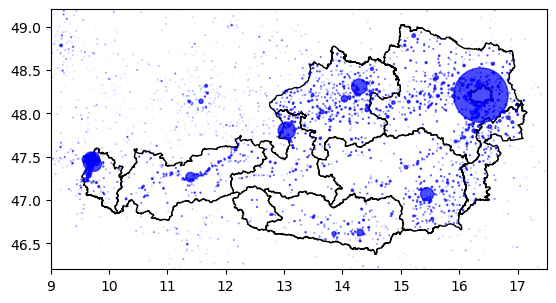

In [19]:
# From GeoPandas, our world map data

#filename = "C:/Users/e12139066/Documents/Thesis/at_10km.shp"
filename = "C:/Users/e12139066/Documents/Thesis/gadm41_AUT_shp/gadm41_AUT_1.shp"
#file = open(filename)
worldmap = gpd.read_file(filename)
#gdf_mask = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_lowres")
#)

#worldmap = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_cities"),
#    mask=gdf_mask[gdf_mask.continent=="Europe"],
#)
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Creating axes and plotting world map
#fig, ax = plt.subplots(figsize=(6, 6))
worldmap.plot(color='white', edgecolor='black')

# Plotting our Impact Energy data with a color map
x = geo_click_count['Longitude']
y = geo_click_count['Latitude']
z = geo_click_count['counts']/36114*4
color = ['red', 'green']
plt.scatter(x, y, s=z, c = 'blue', alpha=0.7)
#plt.colorbar(label='counts')

# Creating axis limits and title
plt.xlim([9, 17.5])
plt.ylim([46.2, 49.2])
plt.show()

#first_year = df["Datetime"].min().strftime("%Y")
#last_year = df["Datetime"].max().strftime("%Y")
#plt.title("NASA: Fireballs Reported by Government Sensors\n" +     
#          str(first_year) + " - " + str(last_year))
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
#plt.show()

In [ ]:
### Other code not used

In [25]:
geo_click_count = df_clicks.SID_Geo.value_counts().rename_axis('SID_Geo').reset_index(name='counts')
geo_click_count['prc'] = geo_click_count['counts']/len(df_clicks)
geo_click_count = geo_click_count.merge(df_geo, on = 'SID_Geo')
geo_click_count.loc[geo_click_count.ATRest =='Rest',][0:15]
#geo_click_count[0:15]

,SID_Geo,counts,prc,Country,CountryCategory,ATRest,CountryName,GeoLocation,GeoAdmin1,GeoAdmin2,GeoAdmin3,GeoAdmin4,FeatureCode,Latitude,Longitude
3,2921044,1261238,0.026461,DE,DE,Rest,Germany,Deutschland,N/A,N/A,N/A,N/A,PCLI,51.50000,10.50000
10,6252001,506534,0.010627,US,US,Rest,United States,USA,N/A,N/A,N/A,N/A,PCLI,39.76000,-98.50000
18,0,151799,0.003185,N/A,Rest,Rest,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0.00000,0.00000
22,2950159,122768,0.002576,DE,DE,Rest,Germany,Berlin,Berlin,N/A,"Berlin, Stadt",Berlin,PPLC,52.52437,13.41053
23,2658434,118243,0.002481,CH,CH,Rest,Switzerland,Schweiz,N/A,N/A,N/A,N/A,PCLI,47.00016,8.01427
25,690791,104106,0.002184,UA,Rest,Rest,Ukraine,Ukraine,N/A,N/A,N/A,N/A,PCLI,49.00000,32.00000
28,2867714,83198,0.001745,DE,DE,Rest,Germany,München,Bayern,Oberbayern,Kreisfreie Stadt München,München,PPLA,48.13743,11.57549
35,2657896,73186,0.001535,CH,CH,Rest,Switzerland,Zürich,Kanton Zürich,Zürich,Zürich,N/A,PPLA,47.36667,8.55000
38,2635167,66803,0.001402,GB,Rest,Rest,United Kingdom,Vereinigtes Königreich,N/A,N/A,N/A,N/A,PCLI,54.75844,-2.69531
39,2750405,66437,0.001394,NL,Rest,Rest,Netherlands,Niederlande,N/A,N/A,N/A,N/A,PCLI,52.25000,5.75000


In [19]:
geo_click_count.loc[geo_click_count.CountryName =='Germany',][0:15]

,SID_Geo,counts,prc,Country,CountryCategory,ATRest,CountryName,GeoLocation,GeoAdmin1,GeoAdmin2,GeoAdmin3,GeoAdmin4,FeatureCode,Latitude,Longitude
2,2921044,1566110,0.030199,DE,DE,Rest,Germany,Deutschland,N/A,N/A,N/A,N/A,PCLI,51.50000,10.50000
17,2950159,189717,0.003658,DE,DE,Rest,Germany,Berlin,Berlin,N/A,"Berlin, Stadt",Berlin,PPLC,52.52437,13.41053
23,2867714,136050,0.002623,DE,DE,Rest,Germany,München,Bayern,Oberbayern,Kreisfreie Stadt München,München,PPLA,48.13743,11.57549
36,2925533,76809,0.001481,DE,DE,Rest,Germany,Frankfurt am Main,Hessen,Regierungsbezirk Darmstadt,Frankfurt am Main,Frankfurt am Main,PPLA3,50.11552,8.68417
37,2911298,74641,0.001439,DE,DE,Rest,Germany,Hamburg,Hamburg,N/A,"Hamburg, Freie und Hansestadt",Hamburg,PPLA,53.57532,10.01534
55,2886242,51058,0.000985,DE,DE,Rest,Germany,Köln,Nordrhein-Westfalen,Regierungsbezirk Köln,Kreisfreie Stadt Köln,Köln,PPLA2,50.93333,6.95000
67,2865376,44411,0.000856,DE,DE,Rest,Germany,Neufahrn bei Freising,Bayern,Oberbayern,Landkreis Freising,Neufahrn b.Freising,PPL,48.31588,11.66316
68,2825297,43515,0.000839,DE,DE,Rest,Germany,Stuttgart,Baden-Württemberg,Regierungsbezirk Stuttgart,Stadtkreis Stuttgart,Stuttgart,PPLA,48.78232,9.17702
72,2861650,42259,0.000815,DE,DE,Rest,Germany,Nürnberg,Bayern,Mittelfranken,Kreisfreie Stadt Nürnberg,Nürnberg,PPL,49.45421,11.07752
95,2879139,26532,0.000512,DE,DE,Rest,Germany,Leipzig,Sachsen,N/A,Kreisfreie Stadt Leipzig,Leipzig,PPLA3,51.33962,12.37129


<AxesSubplot: >

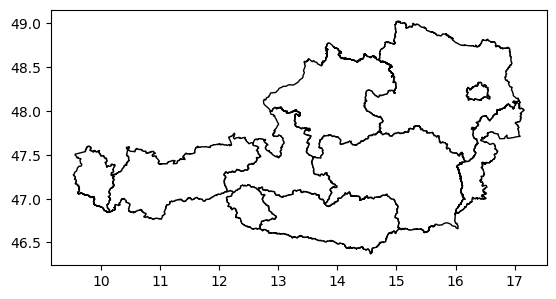

In [9]:
#Shape files found at https://gadm.org/download_country.html
filename = "C:/Users/e12139066/Documents/Thesis/gadm41_AUT_shp/gadm41_AUT_1.shp"
#filename = "C:/Users/e12139066/Documents/Thesis/gadm41_AUT_1.shp"
#file = open(filename)
worldmap = gpd.read_file(filename)
worldmap.plot(color='white', edgecolor='black')

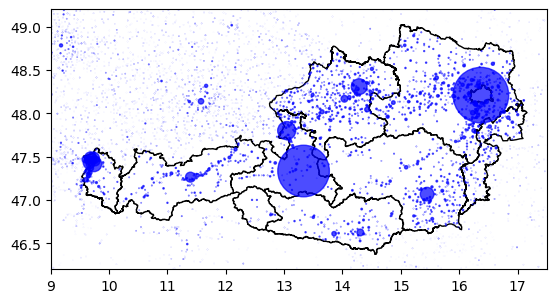

In [10]:
# From GeoPandas, our world map data

#filename = "C:/Users/e12139066/Documents/Thesis/at_10km.shp"
filename = "C:/Users/e12139066/Documents/Thesis/gadm41_AUT_shp/gadm41_AUT_1.shp"
#file = open(filename)
worldmap = gpd.read_file(filename)
#gdf_mask = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_lowres")
#)

#worldmap = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_cities"),
#    mask=gdf_mask[gdf_mask.continent=="Europe"],
#)
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Creating axes and plotting world map
#fig, ax = plt.subplots(figsize=(6, 6))
worldmap.plot(color='white', edgecolor='black')

# Plotting our Impact Energy data with a color map
x = geo_click_count['Longitude']
y = geo_click_count['Latitude']
z = geo_click_count['counts']/36114*4
color = ['red', 'green']
plt.scatter(x, y, s=z, c = 'blue', alpha=0.7)
#plt.colorbar(label='counts')

# Creating axis limits and title
plt.xlim([9, 17.5])
plt.ylim([46.2, 49.2])
plt.show()

#first_year = df["Datetime"].min().strftime("%Y")
#last_year = df["Datetime"].max().strftime("%Y")
#plt.title("NASA: Fireballs Reported by Government Sensors\n" +     
#          str(first_year) + " - " + str(last_year))
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
#plt.show()

ValueError: The dataframe and given column have different number of rows.

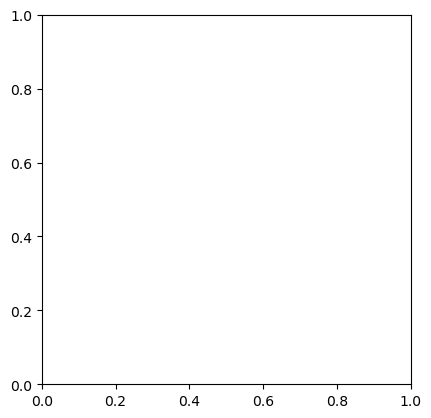

In [11]:

#file = open(filename)
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf_mask = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_lowres")
#)

#worldmap = gpd.read_file(
#    gpd.datasets.get_path("naturalearth_cities"),
#    mask=gdf_mask[gdf_mask.continent=="Europe"],
#)
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Creating axes and plotting world map
#fig, ax = plt.subplots(figsize=(6, 6))
#worldmap.plot(color='white', edgecolor='black')
worldmap.plot(column = geo_click_count['counts'], cmap='OrRd')

# Plotting our Impact Energy data with a color map
x = geo_click_count['Longitude']
y = geo_click_count['Latitude']
z = geo_click_count['counts']/36114
color = ['red', 'green']
#plt.scatter(x, y, s=z, c = 'blue', alpha=0.7)
#plt.colorbar(label='counts')

# Creating axis limits and title
#plt.xlim([-170, 170])
plt.ylim([-60, 90])
plt.show()


In [ ]:
clicks_by_country = df_clicks.Coun

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
